In [77]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alliswell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alliswell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from string import digits

In [79]:
dataset=pd.read_csv('Apple-Twitter-Sentiment-DFE.csv',encoding='latin-1')
dataset.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...


In [80]:
dataset=dataset.drop(['_unit_id','_golden','_unit_state', '_trusted_judgments','_last_judgment_at','sentiment:confidence','date','id','query','sentiment_gold'],axis=1)
dataset.head()

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL


In [81]:
dataset.dtypes

sentiment     int64
text         object
dtype: object

In [82]:
dataset['word_count']=dataset['text'].apply(lambda x:len(str(x).split(" ")))
dataset[['text','word_count']].head()

,text,word_count
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,7
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,12
2,My cat only chews @apple cords. Such an #Apple...,9
3,I agree with @jimcramer that the #IndividualIn...,22
4,Nobody expects the Spanish Inquisition #AAPL,6


In [83]:
dataset['char_count']=dataset['text'].str.len()
dataset[['text','char_count']].head()

,text,char_count
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,65
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,94
2,My cat only chews @apple cords. Such an #Apple...,51
3,I agree with @jimcramer that the #IndividualIn...,136
4,Nobody expects the Spanish Inquisition #AAPL,44


In [84]:
dataset['stopwords']=dataset['text'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
dataset[['text','stopwords']].head()

,text,stopwords
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,0
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,1
2,My cat only chews @apple cords. Such an #Apple...,2
3,I agree with @jimcramer that the #IndividualIn...,10
4,Nobody expects the Spanish Inquisition #AAPL,1


In [85]:
dataset['R']=dataset['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
dataset['R'].head()

0    #aapl:the 10 best steve jobs emails ever...htt...
1    rt @jpdesloges: why aapl stock had a mini-flas...
2    my cat only chews @apple cords. such an #apple...
3    i agree with @jimcramer that the #individualin...
4         nobody expects the spanish inquisition #aapl
Name: R, dtype: object

In [86]:
dataset['Re']=dataset['R'].str.replace('[^\w\s]','')
dataset['Re'].head()

0    aaplthe 10 best steve jobs emails everhttptco8...
1    rt jpdesloges why aapl stock had a miniflash c...
2      my cat only chews apple cords such an applesnob
3    i agree with jimcramer that the individualinve...
4          nobody expects the spanish inquisition aapl
Name: Re, dtype: object

In [87]:
dataset['Rev']=dataset['Re'].apply(lambda x:" ".join(x for x in x.split() if x not in stopwords.words('english')))
dataset['Rev'].head()

0    aaplthe 10 best steve jobs emails everhttptco8...
1    rt jpdesloges aapl stock miniflash crash today...
2                      cat chews apple cords applesnob
3    agree jimcramer individualinvestor trade apple...
4              nobody expects spanish inquisition aapl
Name: Rev, dtype: object

In [88]:
a=dataset['Rev'].values
a

array(['aaplthe 10 best steve jobs emails everhttptco82g1kl94tx',
       'rt jpdesloges aapl stock miniflash crash today aapl aapl httptcohgfcjya0e9',
       'cat chews apple cords applesnob', ...,
       'marcbulandr could agree apple twitter ibmwatson great things happen appleandibm ibmandtwitter',
       'iphone 5s photos longer downloading automatically laptop sync apple support unhelpful ideas',
       'rt swiftkey excited named apples app store best 2014 list year httptcod7qlmti4uf apple'],
      dtype=object)

In [89]:
def txt(a):
    string=" "
    for i in a:
        string+=i
    return string
print(txt(a))

 aaplthe 10 best steve jobs emails everhttptco82g1kl94txrt jpdesloges aapl stock miniflash crash today aapl aapl httptcohgfcjya0e9cat chews apple cords applesnobagree jimcramer individualinvestor trade apple aapl extended todays pullback good seenobody expects spanish inquisition aaplaapl5 rocket stocks buy december gains apple morehttptcoeg5xhxdllstop 3 apple tablets damn right httptcorjign2juubcnbctv apples margins better expected aapl httptco7gevrtoglkapple inc flash crash need know httptcoyjigtifdaj aaplaaplthis presentation shows makes worlds biggest tech companies httptcoqlh9pqsosdwtf battery 31 one second ago 29 wtf appleapple watch tops search engine list best wearable tech httptcoltezjzqqf8 aapl iwatch applewatchbestdesigned iphone apps world according apple httptcorazqvpxofg httptcoev7ukwieczrt peterpham bought augustsmartlock apple storepretty good logo match cant wait install httptcoz8vkmhbnr3apple contact sync yosemite ios8 seriously screwed used much stable past icloud is

In [90]:
remove_num=str.maketrans('','',digits)
r=txt(a).translate(remove_num)
r

' aaplthe  best steve jobs emails everhttptcogkltxrt jpdesloges aapl stock miniflash crash today aapl aapl httptcohgfcjyaecat chews apple cords applesnobagree jimcramer individualinvestor trade apple aapl extended todays pullback good seenobody expects spanish inquisition aaplaapl rocket stocks buy december gains apple morehttptcoegxhxdllstop  apple tablets damn right httptcorjignjuubcnbctv apples margins better expected aapl httptcogevrtoglkapple inc flash crash need know httptcoyjigtifdaj aaplaaplthis presentation shows makes worlds biggest tech companies httptcoqlhpqsosdwtf battery  one second ago  wtf appleapple watch tops search engine list best wearable tech httptcoltezjzqqf aapl iwatch applewatchbestdesigned iphone apps world according apple httptcorazqvpxofg httptcoevukwieczrt peterpham bought augustsmartlock apple storepretty good logo match cant wait install httptcozvkmhbnrapple contact sync yosemite ios seriously screwed used much stable past icloud isyncaapl applenws thanks

In [91]:
tokens=word_tokenize(r)
tokens[:20]

['aaplthe',
 'best',
 'steve',
 'jobs',
 'emails',
 'everhttptcogkltxrt',
 'jpdesloges',
 'aapl',
 'stock',
 'miniflash',
 'crash',
 'today',
 'aapl',
 'aapl',
 'httptcohgfcjyaecat',
 'chews',
 'apple',
 'cords',
 'applesnobagree',
 'jimcramer']

In [92]:
tokens_n=[word for word in tokens if word not in stopwords.words('english')]
tokens_n[:20]

['aaplthe',
 'best',
 'steve',
 'jobs',
 'emails',
 'everhttptcogkltxrt',
 'jpdesloges',
 'aapl',
 'stock',
 'miniflash',
 'crash',
 'today',
 'aapl',
 'aapl',
 'httptcohgfcjyaecat',
 'chews',
 'apple',
 'cords',
 'applesnobagree',
 'jimcramer']

In [93]:
count_freq=Counter(tokens_n)
count_freq

Counter({'aaplthe': 1,
         'best': 46,
         'steve': 62,
         'jobs': 76,
         'emails': 18,
         'everhttptcogkltxrt': 1,
         'jpdesloges': 37,
         'aapl': 967,
         'stock': 64,
         'miniflash': 4,
         'crash': 14,
         'today': 43,
         'httptcohgfcjyaecat': 1,
         'chews': 1,
         'apple': 2663,
         'cords': 6,
         'applesnobagree': 1,
         'jimcramer': 1,
         'individualinvestor': 1,
         'trade': 34,
         'extended': 1,
         'todays': 1,
         'pullback': 3,
         'good': 39,
         'seenobody': 1,
         'expects': 1,
         'spanish': 1,
         'inquisition': 2,
         'aaplaapl': 4,
         'rocket': 1,
         'stocks': 75,
         'buy': 53,
         'december': 91,
         'gains': 2,
         'morehttptcoegxhxdllstop': 1,
         'tablets': 3,
         'damn': 14,
         'right': 22,
         'httptcorjignjuubcnbctv': 1,
         'apples': 95,
         'margi

In [94]:
most_freq=count_freq.most_common(20)
most_freq

[('apple', 2663),
 ('aapl', 967),
 ('iphone', 397),
 ('need', 394),
 ('one', 378),
 ('future', 326),
 ('computers', 314),
 ('batteries', 313),
 ('ft', 311),
 ('outlet', 310),
 ('studio', 310),
 ('onerepublic', 306),
 ('store', 257),
 ('httptcoastpxketrt', 175),
 ('nyc', 166),
 ('new', 159),
 ('teamcavuto', 157),
 ('stage', 156),
 ('protests', 156),
 ('protesters', 156)]

In [95]:
string=" "
for word,freq in most_freq:
    string=string+" "+word   

In [96]:
wordcloud_est=WordCloud(width=800,height=800,min_font_size=10)
wordcloud=wordcloud_est.generate(string)

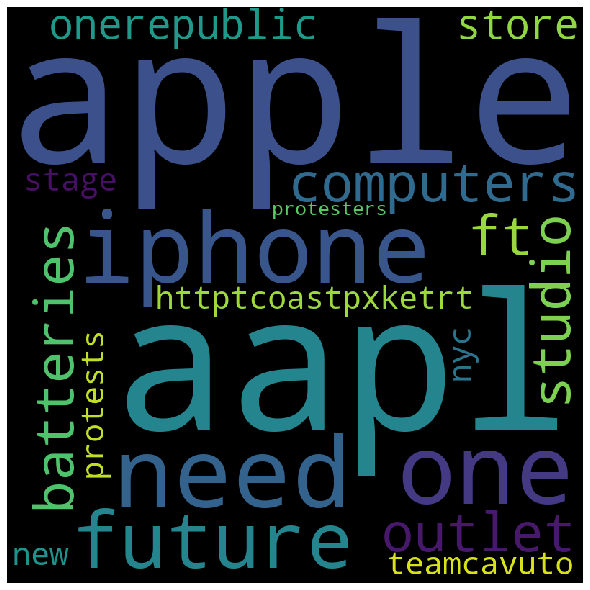

In [97]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [98]:
from wordcloud import WordCloud,STOPWORDS

In [99]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(["need", "one", "aapl", "httptcoastpxketrt", "teamcavuto", "ft"])

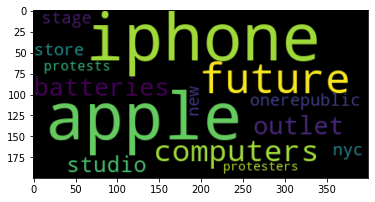

In [100]:
my_cloud = WordCloud(stopwords=my_stopwords).generate(string)
plt.imshow(my_cloud, interpolation='bilinear')

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
vect = CountVectorizer(max_features=1000)
vect.fit(dataset.text)
x= vect.transform(dataset.text)

In [103]:
x_df = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
x_df.head()

,00,000,10,100,11,115,12,13,135,140,...,years,yes,yesterday,yet,yo,yosemite,you,your,youtube,zuckerberg
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y=dataset.sentiment
y.head()

0    3
1    3
2    3
3    3
4    3
Name: sentiment, dtype: int64

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y)

In [113]:
logreg=LogisticRegression()

In [114]:
logreg.fit(x_train,y_train)

C:\Users\alliswell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alliswell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
predictions=logreg.predict(x_test)
predictions

array([3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 5, 1, 1, 3, 1, 5, 3, 3, 3, 3,
       1, 3, 3, 3, 5, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 5, 5, 1, 1,
       3, 1, 1, 3, 3, 3, 1, 5, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1,
       1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 5, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 5, 1, 1, 3, 1, 3, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 5, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1,
       1, 1, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 5, 3, 1, 3, 1, 3, 1, 5, 3,
       1, 5, 3, 3, 5, 3, 3, 3, 5, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 5, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 1, 5, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,

In [116]:
logreg.score(x_df,y)

0.8286155429747812